In [1]:
import pandas as pd
import numpy as np
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta


In [2]:
# Đọc dữ liệu từ 3 file CSV
customers_df = pd.read_csv('customers.csv')
products_df = pd.read_csv('products.csv')
orders_df = pd.read_csv('orders.csv')

In [3]:
# Chuyển đổi cột 'Date' thành định dạng datetime
orders_df['Date'] = pd.to_datetime(orders_df['Date'])

# Tính toán ngày mua hàng cuối cùng của mỗi khách hàng
last_purchase_date = orders_df.groupby('Customer_ID')['Date'].max().reset_index()
last_purchase_date.columns = ['Customer_ID', 'Last_Purchase_Date']

# Xác định ngày mốc là 1/1/2024
reference_date = datetime(2024, 1, 1)

# Xác định những khách hàng có ngày mua hàng cuối cùng cách đây hơn 3 tháng
inactive_customers = last_purchase_date[last_purchase_date['Last_Purchase_Date'] < (reference_date - timedelta(days=90))]

# Thêm cột 'Month' để xác định tháng của ngày mua hàng cuối cùng
inactive_customers.loc[:, 'Month'] = inactive_customers['Last_Purchase_Date'].dt.to_period('M').astype(str)

# Đếm số lượng khách hàng rời theo từng tháng
monthly_inactive_counts = inactive_customers['Month'].value_counts().reset_index()
monthly_inactive_counts.columns = ['Month', 'Inactive_Customers']

# Vẽ biểu đồ thể hiện số lượng khách hàng rời theo từng tháng
graph = px.bar(monthly_inactive_counts, x='Month', y='Inactive_Customers', title='Số lượng khách hàng rời theo từng tháng')
graph.show()

C:\Users\AN515-45\AppData\Local\Temp\ipykernel_1712\2736580046.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_customers.loc[:, 'Month'] = inactive_customers['Last_Purchase_Date'].dt.to_period('M').astype(str)


In [4]:
# Chuyển đổi cột 'Date' thành định dạng datetime
orders_df['Date'] = pd.to_datetime(orders_df['Date'])

# Kết hợp dữ liệu đơn hàng với dữ liệu sản phẩm
merged_df = orders_df.merge(products_df, on='Product_ID')

# Đếm số lượng sản phẩm được mua theo từng thương hiệu
brand_counts = merged_df['Product_Brand'].value_counts().reset_index()
brand_counts.columns = ['Product_Brand', 'Count']

# Lấy top 5 thương hiệu được ưa chuộng nhất
top_5_brands = brand_counts.nlargest(5, 'Count')

# Vẽ biểu đồ thể hiện top 5 thương hiệu được ưa chuộng nhất
graph = px.bar(top_5_brands, x='Product_Brand', y='Count', title='Top 5 thương hiệu được ưa chuộng nhất')
graph.show()

In [5]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [6]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [7]:
data = pd.read_csv('new_retail_data.csv')


In [8]:
print(data.columns)


Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')


   Customer_ID  Recency  Frequency     Monetary
0      10000.0    103.0          4  5007.566357
1      10001.0    105.0          5  8136.462824
2      10002.0     95.0          5  4104.013951
3      10003.0    228.0          2  2340.496447
4      10004.0     31.0          2  2356.516683


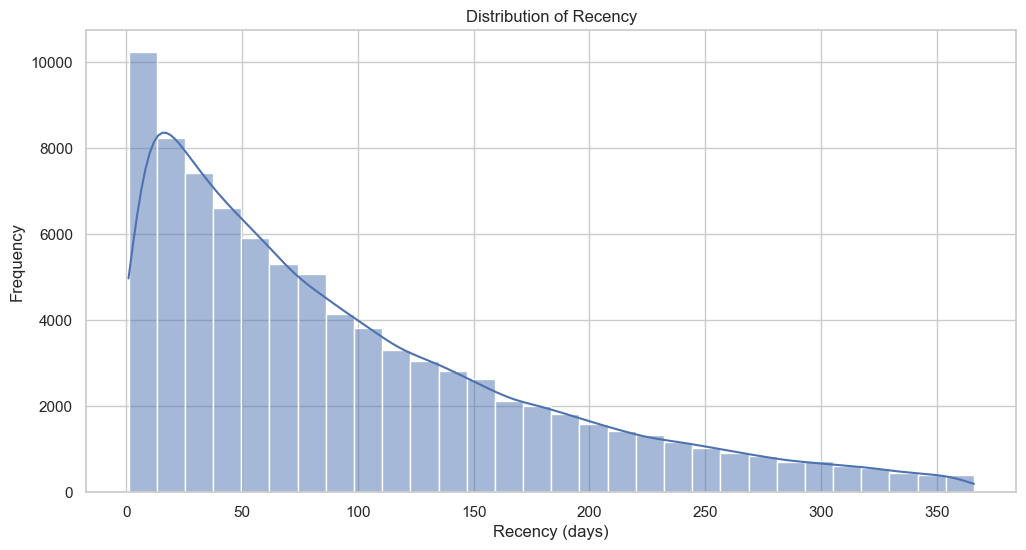

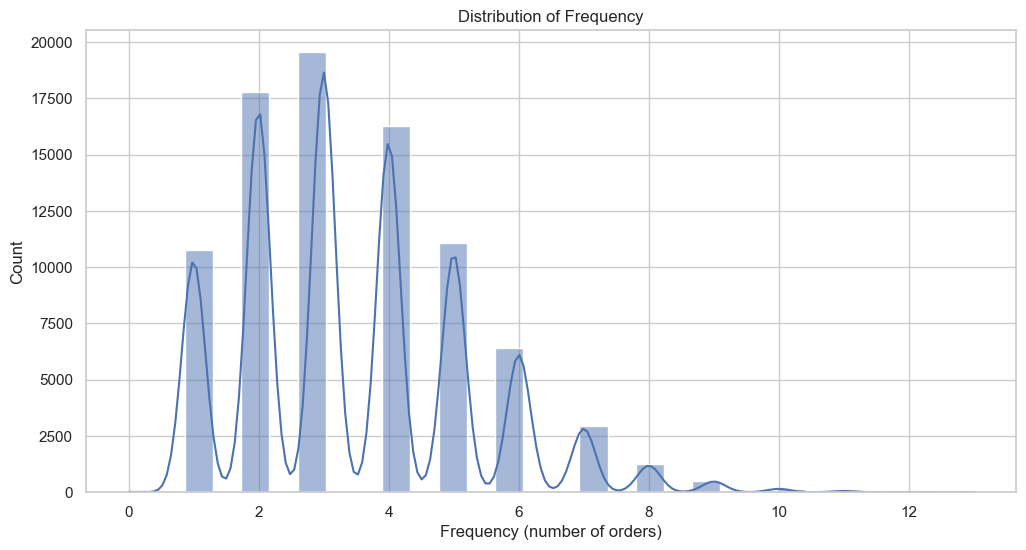

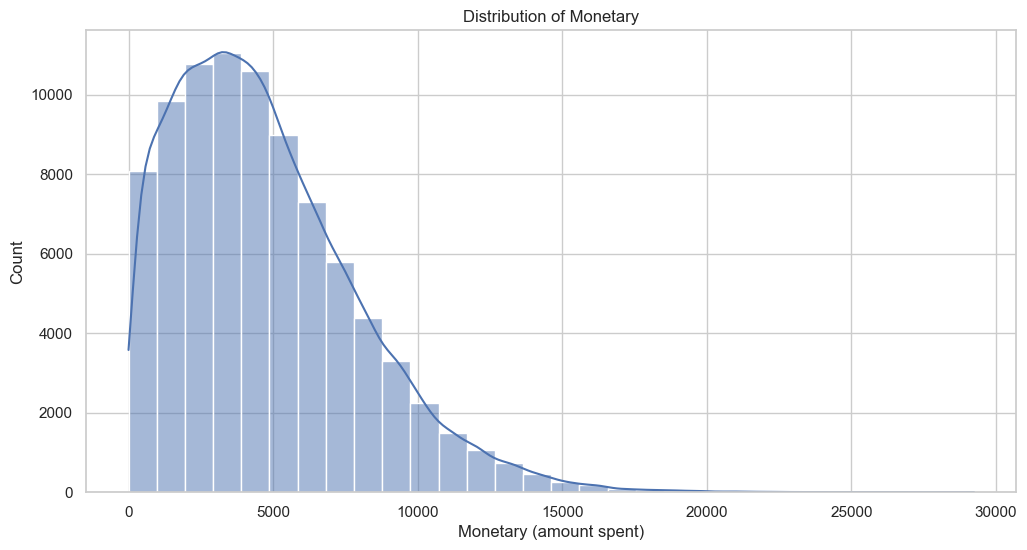

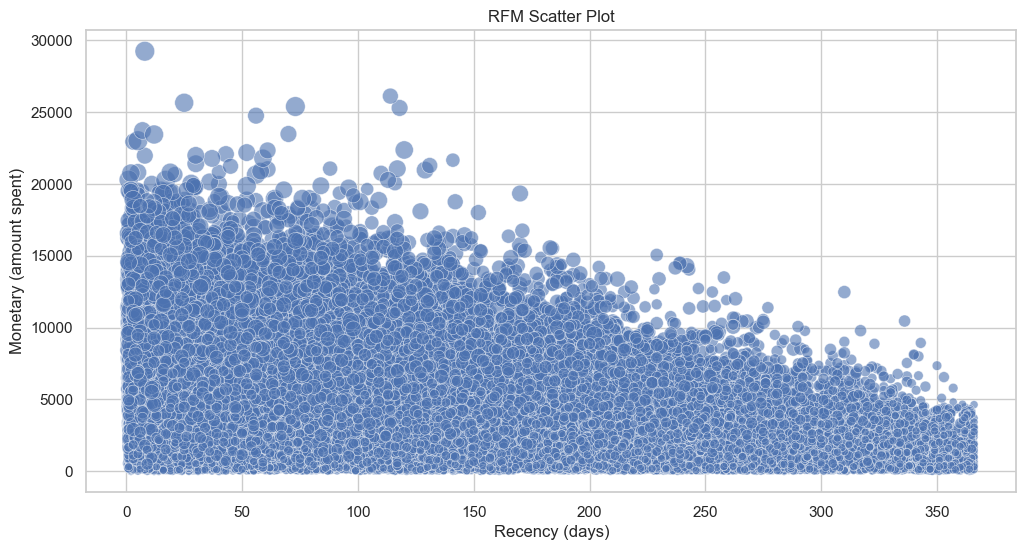

In [9]:
import datetime as dt

# Chuyển đổi cột 'Date' thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])

# Xác định ngày tham chiếu cho 'Recency'
reference_date = data['Date'].max() + dt.timedelta(days=1)

# Tính toán các chỉ số RFM
rfm = data.groupby('Customer_ID').agg({
    'Date': lambda x: (reference_date - x.max()).days,  # Recency
    'Transaction_ID': 'count',  # Frequency
    'Total_Amount': 'sum'  # Monetary
}).reset_index()

# Đổi tên các cột
rfm.columns = ['Customer_ID', 'Recency', 'Frequency', 'Monetary']

# Hiển thị bảng RFM
print(rfm.head())

# Thiết lập kiểu cho biểu đồ
sns.set(style="whitegrid")

# Vẽ biểu đồ phân phối Recency
plt.figure(figsize=(12, 6))
sns.histplot(rfm['Recency'], bins=30, kde=True)
plt.title('Distribution of Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.show()

# Vẽ biểu đồ phân phối Frequency
plt.figure(figsize=(12, 6))
sns.histplot(rfm['Frequency'], bins=30, kde=True)
plt.title('Distribution of Frequency')
plt.xlabel('Frequency (number of orders)')
plt.ylabel('Count')
plt.show()

# Vẽ biểu đồ phân phối Monetary
plt.figure(figsize=(12, 6))
sns.histplot(rfm['Monetary'], bins=30, kde=True)
plt.title('Distribution of Monetary')
plt.xlabel('Monetary (amount spent)')
plt.ylabel('Count')
plt.show()

# Vẽ biểu đồ RFM phân tán
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Recency', y='Monetary', size='Frequency', data=rfm, sizes=(20, 200), legend=False, alpha=0.6)
plt.title('RFM Scatter Plot')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary (amount spent)')
plt.show()

C:\Users\AN515-45\AppData\Local\Temp\ipykernel_1712\404982367.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



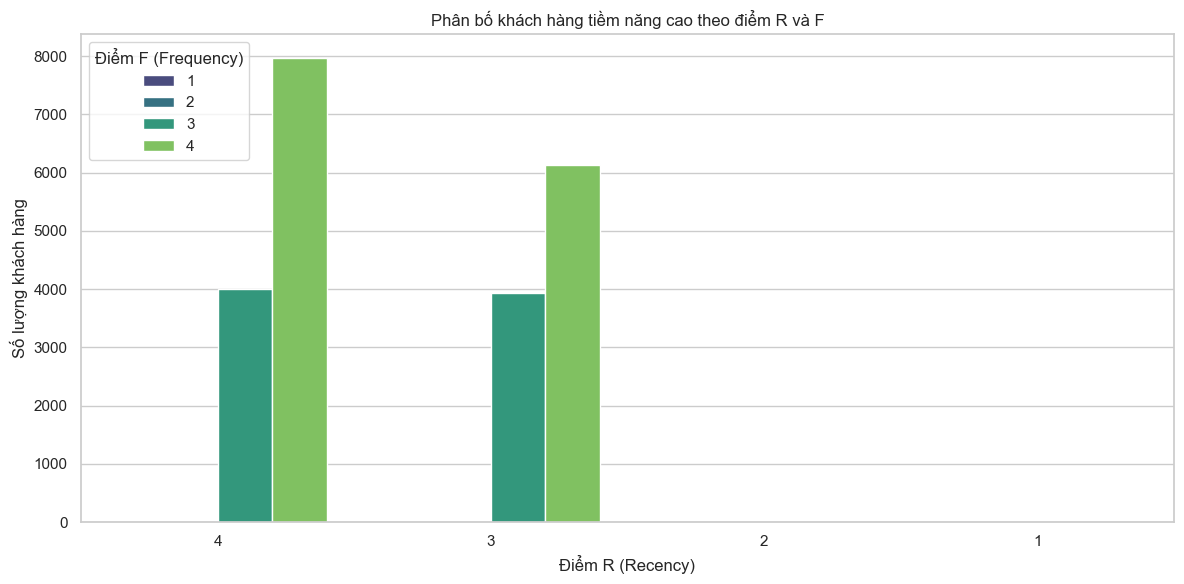

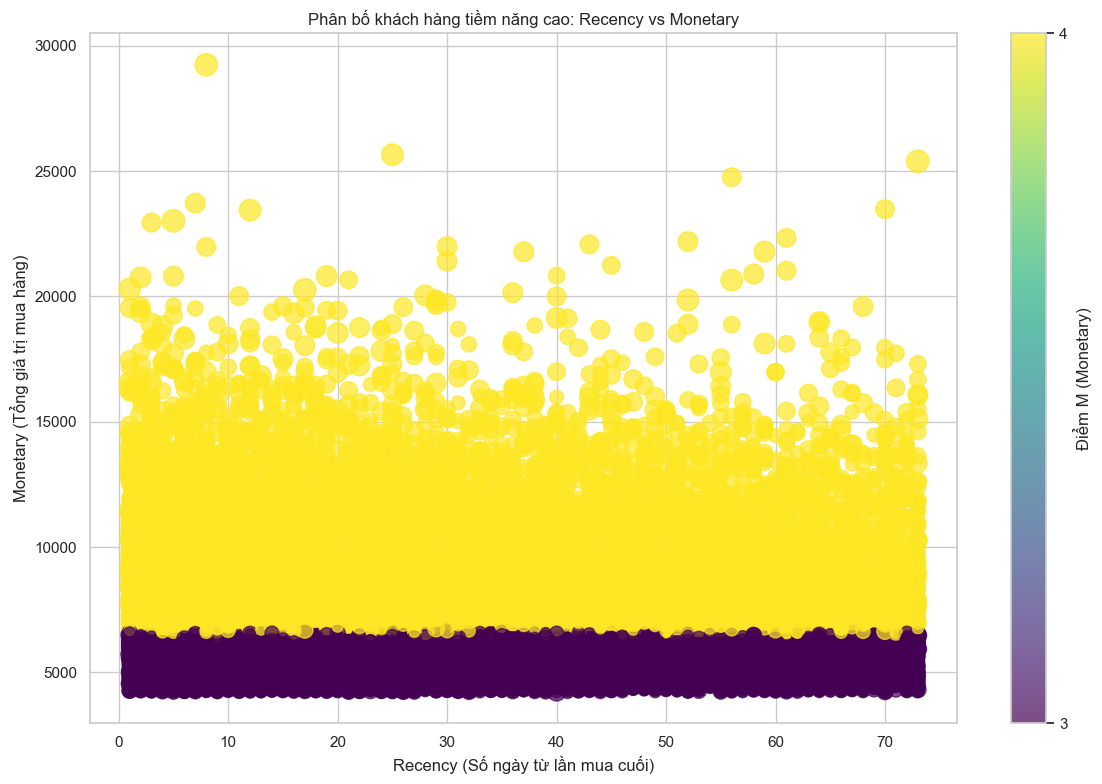

            Recency     Frequency      Monetary
count  22045.000000  22045.000000  22045.000000
mean      31.201225      5.281560   7874.768096
std       20.627325      1.421753   2746.510522
min        1.000000      3.000000   4224.405661
25%       13.000000      4.000000   5760.904182
50%       29.000000      5.000000   7308.812059
75%       48.000000      6.000000   9374.598155
max       73.000000     13.000000  29241.776770
       Customer_ID  Recency  Frequency      Monetary RFM_Score
37101      48453.0      8.0         13  29241.776770       444
31801      42972.0     25.0         12  25654.737170       444
78049      90983.0     73.0         13  25393.236856       344
2549       12651.0     56.0          9  24757.661296       344
52753      64700.0      7.0         10  23721.566430       444
79498      92491.0     70.0          9  23482.049186       344
77841      90769.0     12.0         12  23446.433887       444
36059      47382.0      5.0         13  23015.431924       444
8

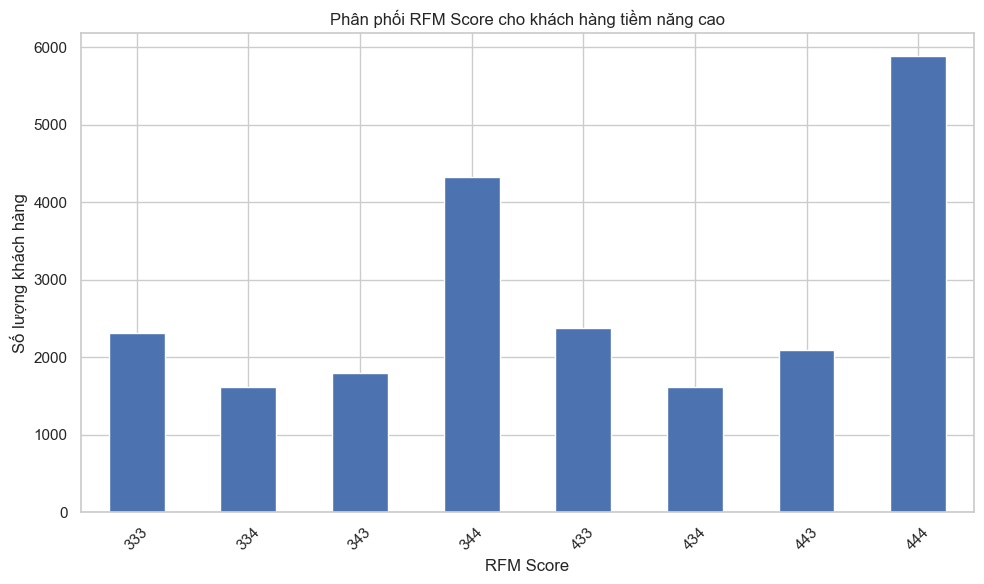

In [10]:

# Xác định ngày tham chiếu cho 'Recency'
reference_date = data['Date'].max() + dt.timedelta(days=1)

# Tính toán các chỉ số RFM
rfm = data.groupby('Customer_ID').agg({
    'Date': lambda x: (reference_date - x.max()).days,  # Recency
    'Transaction_ID': 'count',  # Frequency
    'Total_Amount': 'sum'  # Monetary
}).reset_index()

# Đổi tên các cột
rfm.columns = ['Customer_ID', 'Recency', 'Frequency', 'Monetary']

# Tính điểm R, F, M
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Kiểm tra và xử lý giá trị NaN
rfm = rfm.dropna(subset=['R_Score', 'F_Score', 'M_Score'])

# Tính điểm tổng hợp RFM
rfm['RFM_Score'] = rfm.R_Score.astype(str) + rfm.F_Score.astype(str) + rfm.M_Score.astype(str)

# Xác định khách hàng tiềm năng cao
def high_potential_customer(row):
    r, f, m = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])
    if r >= 3 and f >= 3 and m >= 3:  # Chỉ chọn khách hàng có điểm từ 3 trở lên cho mỗi chỉ số
        return 'High Potential'
    return 'Other'

rfm['Customer_Potential'] = rfm.apply(high_potential_customer, axis=1)

# Lọc ra chỉ khách hàng tiềm năng cao
high_potential_customers = rfm[rfm['Customer_Potential'] == 'High Potential']

# Chuyển đổi M_Score thành giá trị số
high_potential_customers['M_Score_Numeric'] = high_potential_customers['M_Score'].astype(int)

# 1. Biểu đồ phân bố khách hàng tiềm năng cao
plt.figure(figsize=(12, 6))
sns.countplot(data=high_potential_customers, x='R_Score', hue='F_Score', palette='viridis')
plt.title('Phân bố khách hàng tiềm năng cao theo điểm R và F')
plt.xlabel('Điểm R (Recency)')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Điểm F (Frequency)')
plt.tight_layout()
plt.show()

# 2. Scatter plot cho khách hàng tiềm năng cao
plt.figure(figsize=(12, 8))
scatter = plt.scatter(high_potential_customers['Recency'], 
                      high_potential_customers['Monetary'], 
                      s=high_potential_customers['Frequency']*20,  # Kích thước điểm thể hiện Frequency
                      c=high_potential_customers['M_Score_Numeric'],  # Màu sắc thể hiện điểm M
                      cmap='viridis',
                      alpha=0.7)
plt.title('Phân bố khách hàng tiềm năng cao: Recency vs Monetary')
plt.xlabel('Recency (Số ngày từ lần mua cuối)')
plt.ylabel('Monetary (Tổng giá trị mua hàng)')
cbar = plt.colorbar(scatter)
cbar.set_label('Điểm M (Monetary)')
cbar.set_ticks([3, 4])
cbar.set_ticklabels(['3', '4'])
plt.tight_layout()
plt.show()

# 3. Thống kê mô tả cho khách hàng tiềm năng cao
print(high_potential_customers[['Recency', 'Frequency', 'Monetary']].describe())

# 4. Top 10 khách hàng tiềm năng cao có giá trị Monetary cao nhất
print(high_potential_customers.nlargest(10, 'Monetary')[['Customer_ID', 'Recency', 'Frequency', 'Monetary', 'RFM_Score']])

# 5. Phân phối RFM Score cho khách hàng tiềm năng cao
plt.figure(figsize=(10, 6))
high_potential_customers['RFM_Score'].value_counts().sort_index().plot(kind='bar')
plt.title('Phân phối RFM Score cho khách hàng tiềm năng cao')
plt.xlabel('RFM Score')
plt.ylabel('Số lượng khách hàng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Đọc dữ liệu
data = pd.read_csv('new_retail_data.csv')

# Tạo danh sách các sản phẩm trong mỗi đơn hàng
transactions = data.groupby('Transaction_ID')['products'].apply(lambda x: x.str.split(',')).tolist()

# Chuyển đổi dữ liệu sử dụng TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Áp dụng thuật toán Apriori với min_support thấp hơn
frequent_itemsets = apriori(df, min_support=0.008, use_colnames=True)

# Tìm các luật kết hợp
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Hiển thị các luật kết hợp
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)

# Lọc và hiển thị các luật kết hợp có lift cao nhất
rules = rules.sort_values(by='lift', ascending=False)
print("\nTop 10 Association Rules by Lift:")
print(rules.head(10))


Frequent Itemsets:
    support           itemsets
0  0.008072        (Adventure)
1  0.008098   (Alkaline water)
2  0.008188   (Artesian water)
3  0.008260    (Bottled water)
4  0.008032    (Coconut water)
5  0.008198  (Distilled water)
6  0.008028   (Flavored water)
7  0.008048    (Mineral water)
8  0.008267          (Mystery)
9  0.008300     (Spring water)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []

Top 10 Association Rules by Lift:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [12]:



# Chuyển đổi cột thời gian
data['Date'] = pd.to_datetime(data['Date'])

# Xác định ngày tham chiếu
reference_date = data['Date'].max() + dt.timedelta(days=1)

# Tính toán các chỉ số RFM
rfm = data.groupby('Customer_ID').agg({
    'Date': lambda x: (reference_date - x.max()).days,  # Recency
    'Transaction_ID': 'count',  # Frequency
    'Amount': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['Customer_ID', 'Recency', 'Frequency', 'Monetary']

# Xử lý các giá trị NaN bằng cách thay thế bằng giá trị trung bình của mỗi cột
rfm['Recency'].fillna(rfm['Recency'].mean(), inplace=True)
rfm['Frequency'].fillna(rfm['Frequency'].mean(), inplace=True)
rfm['Monetary'].fillna(rfm['Monetary'].mean(), inplace=True)

# Chia RFM thành các nhóm
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=['1', '2', '3', '4']).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=['4', '3', '2', '1']).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=['4', '3', '2', '1']).astype(int)

# Tạo RFM Segment và RFM Score
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# Xác định khách hàng tiềm năng cao
def high_potential_customer(row):
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    if r >= 3 and f >= 3 and m >= 3:  # Chỉ chọn khách hàng có điểm từ 3 trở lên cho mỗi chỉ số
        return 'High Potential'
    return 'Other'

rfm['Customer_Potential'] = rfm.apply(high_potential_customer, axis=1)

# Lọc ra chỉ khách hàng tiềm năng cao
high_potential_customers = rfm[rfm['Customer_Potential'] == 'High Potential']

# Thêm cột thời gian vào dữ liệu RFM
high_potential_customers = high_potential_customers.merge(data[['Customer_ID', 'Date']], on='Customer_ID')

# Vẽ biểu đồ phân bố RFM theo thời gian
plt.figure(figsize=(12, 6))
sns.lineplot(data=high_potential_customers, x='Date', y='RFM_Score', hue='Customer_ID', legend=False)
plt.title('Phân bố chỉ số RFM của khách hàng tiềm năng theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('RFM Score')
plt.show()


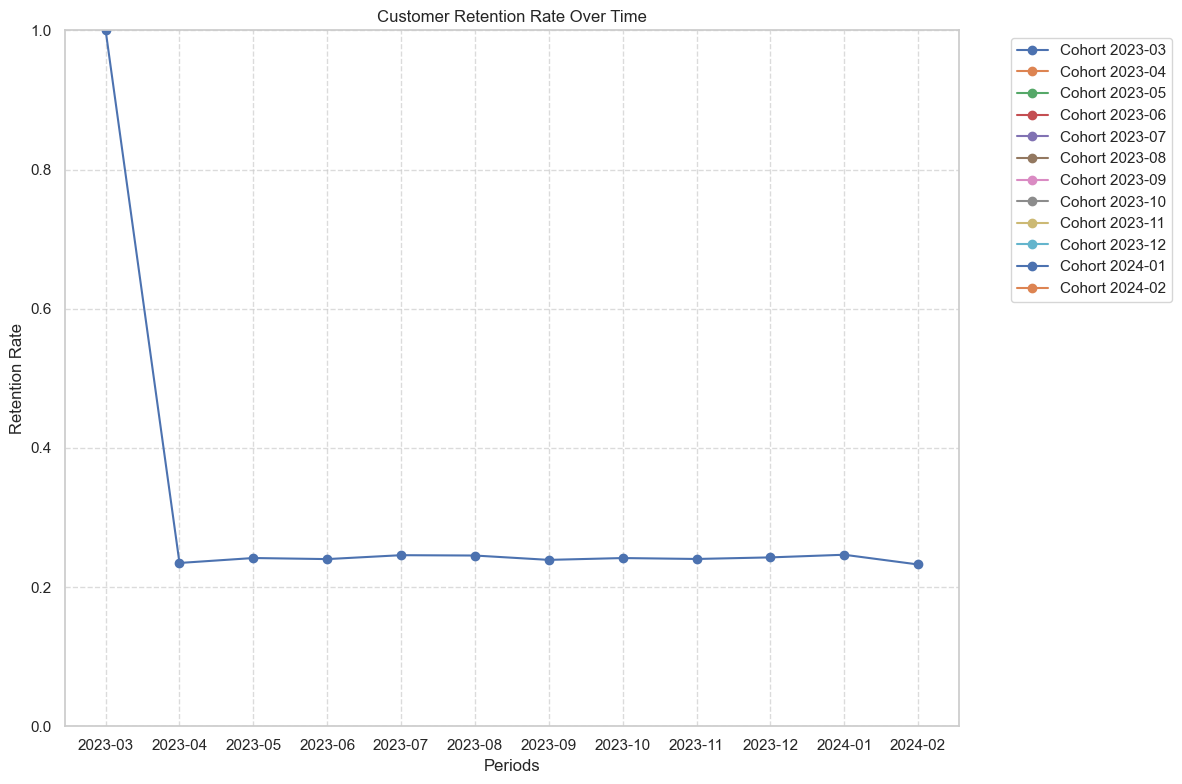

In [ ]:
# Assuming 'data' and necessary libraries are already imported and defined as before
import pandas as pd
import matplotlib.pyplot as plt

# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Assign cohort month based on the first purchase
data['CohortMonth'] = data.groupby('Customer_ID')['Date'].transform('min').dt.to_period('M')

# Assign order month
data['OrderMonth'] = data['Date'].dt.to_period('M')

# Group by cohort and order month to count unique customers
cohort_data = data.groupby(['CohortMonth', 'OrderMonth']).agg({'Customer_ID': pd.Series.nunique}).reset_index()

# Rename columns for clarity
cohort_data.rename(columns={'Customer_ID': 'NumCustomers'}, inplace=True)

# Create a pivot table to analyze retention
cohort_pivot = cohort_data.pivot_table(index='CohortMonth', columns='OrderMonth', values='NumCustomers')

# Calculate the size of each cohort
cohort_size = cohort_pivot.iloc[:, 0]

# Calculate retention rate
retention = cohort_pivot.divide(cohort_size, axis=0)

# Calculate the number of periods for each cohort
retention['Periods'] = range(1, retention.shape[1] + 1)
plt.figure(figsize=(12, 8))

# Plot all cohorts at once
for cohort_index, cohort_row in retention.iterrows():
    plt.plot(cohort_row.index[:-1].astype(str), cohort_row[:-1], marker='o', label=f'Cohort {cohort_index}')

plt.title('Customer Retention Rate Over Time')
plt.xlabel('Periods')
plt.ylabel('Retention Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



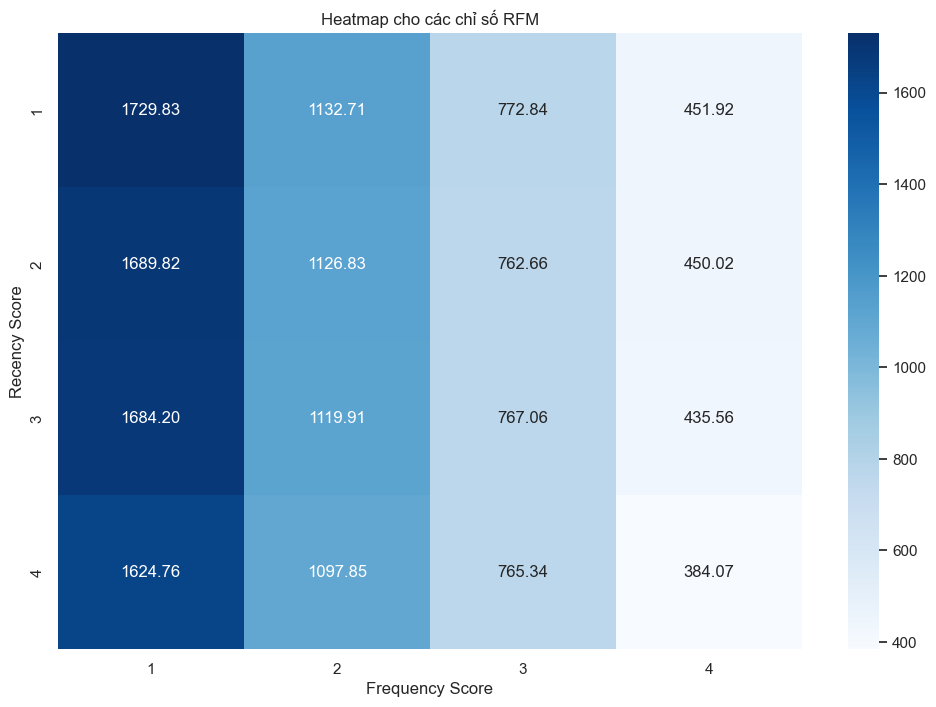

In [ ]:
# Biểu đồ Heatmap cho các chỉ số RFM
rfm_scores = rfm.pivot_table(index='R_Score', columns='F_Score', values='Monetary', aggfunc='mean').fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(rfm_scores, annot=True, fmt='.2f', cmap='Blues')
plt.title('Heatmap cho các chỉ số RFM')
plt.xlabel('Frequency Score')
plt.ylabel('Recency Score')
plt.show()


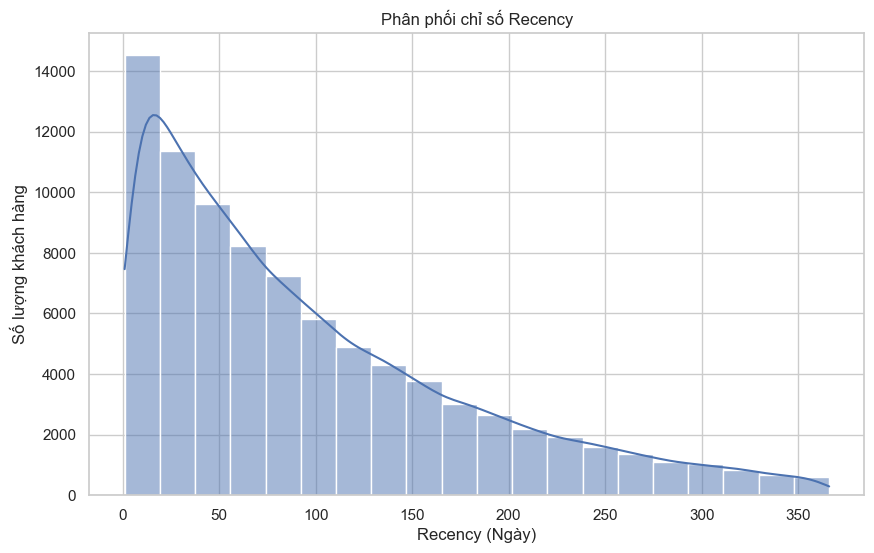

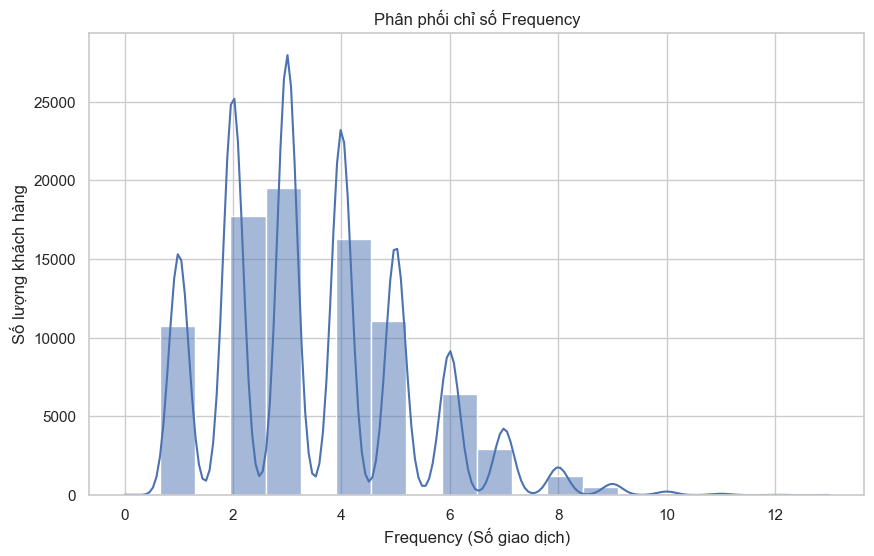

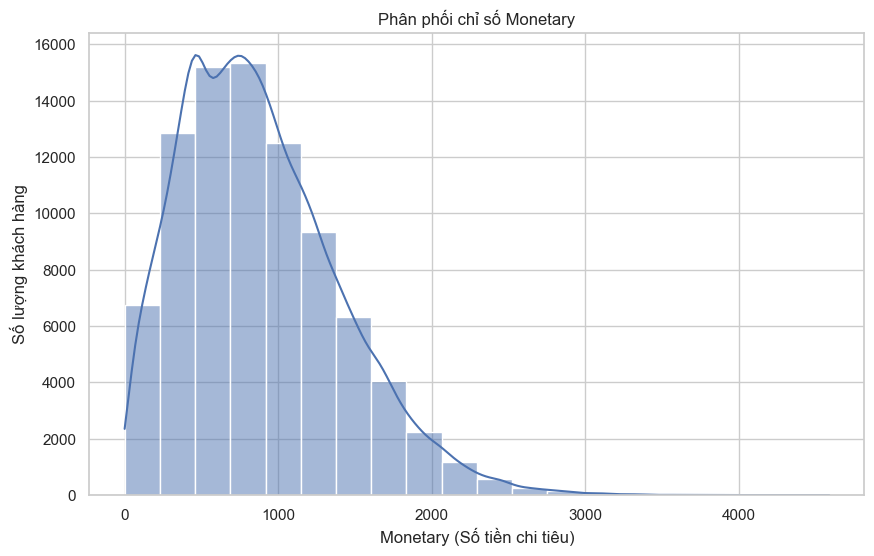

In [ ]:
# Biểu đồ phân phối chỉ số Recency
plt.figure(figsize=(10, 6))
sns.histplot(rfm['Recency'], bins=20, kde=True)
plt.title('Phân phối chỉ số Recency')
plt.xlabel('Recency (Ngày)')
plt.ylabel('Số lượng khách hàng')
plt.show()

# Biểu đồ phân phối chỉ số Frequency
plt.figure(figsize=(10, 6))
sns.histplot(rfm['Frequency'], bins=20, kde=True)
plt.title('Phân phối chỉ số Frequency')
plt.xlabel('Frequency (Số giao dịch)')
plt.ylabel('Số lượng khách hàng')
plt.show()

# Biểu đồ phân phối chỉ số Monetary
plt.figure(figsize=(10, 6))
sns.histplot(rfm['Monetary'], bins=20, kde=True)
plt.title('Phân phối chỉ số Monetary')
plt.xlabel('Monetary (Số tiền chi tiêu)')
plt.ylabel('Số lượng khách hàng')
plt.show()


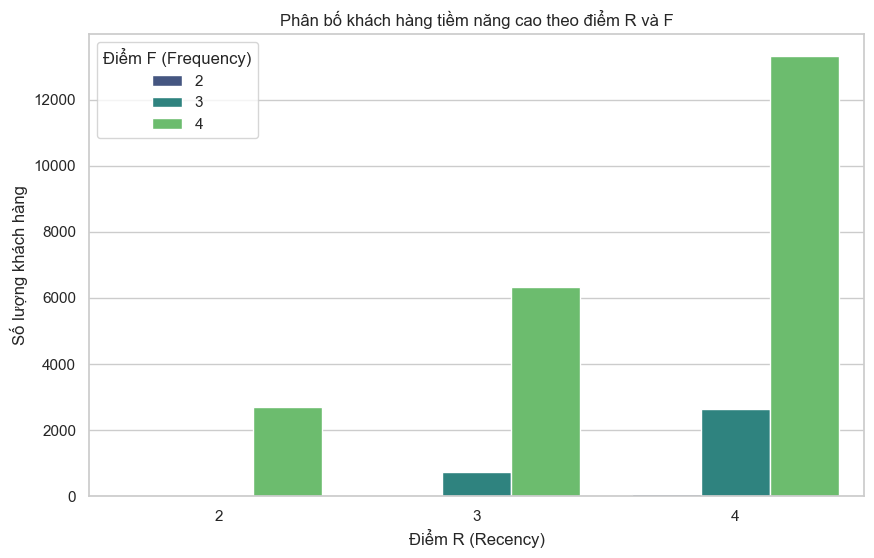

In [ ]:
# Xác định khách hàng tiềm năng cao (RFM >= 10)
high_potential_customers = rfm[rfm['RFM_Score'] >= 10]

# Biểu đồ phân tích khách hàng tiềm năng cao
plt.figure(figsize=(10, 6))
sns.countplot(data=high_potential_customers, x='R_Score', hue='F_Score', palette='viridis')
plt.title('Phân bố khách hàng tiềm năng cao theo điểm R và F')
plt.xlabel('Điểm R (Recency)')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Điểm F (Frequency)')
plt.show()


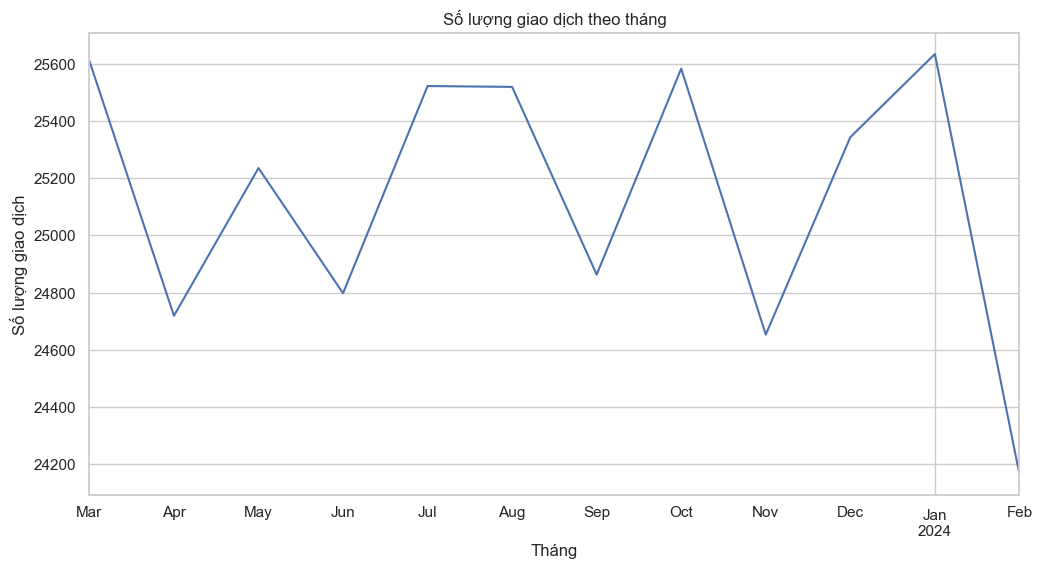

In [ ]:
# Chuyển đổi cột 'Date' thành kiểu datetime
data['Date'] = pd.to_datetime(data['Date'])

# Thống kê số lượng giao dịch theo tháng
transactions_by_month = data.set_index('Date').resample('M').size()

# Biểu đồ số lượng giao dịch theo tháng
plt.figure(figsize=(12, 6))
transactions_by_month.plot()
plt.title('Số lượng giao dịch theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lượng giao dịch')
plt.show()


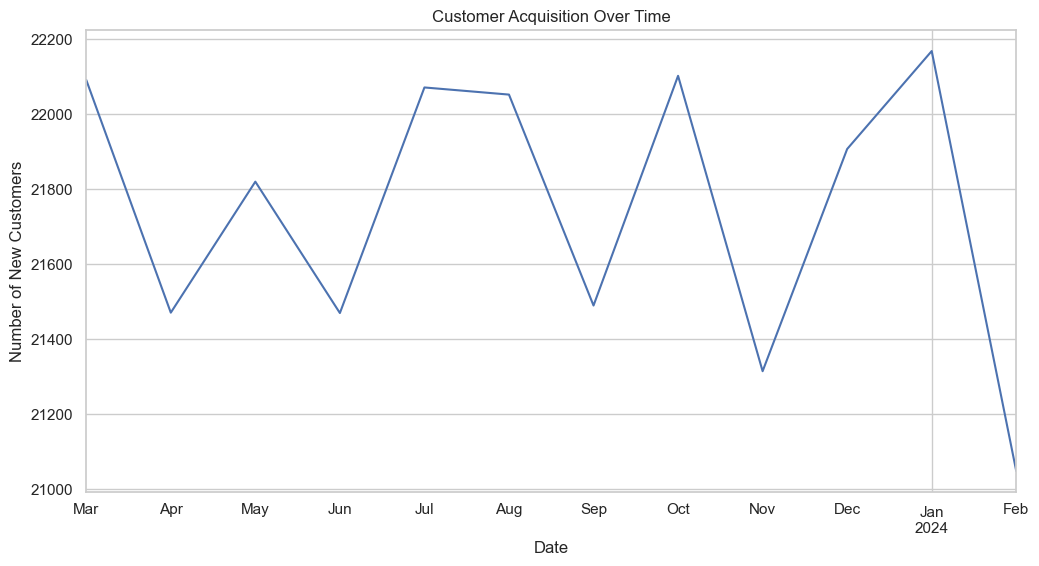

In [ ]:
acquisition = data.groupby(data['Date'].dt.to_period('M'))['Customer_ID'].nunique()
acquisition.plot(kind='line', figsize=(12, 6))
plt.title('Customer Acquisition Over Time')
plt.xlabel('Date')
plt.ylabel('Number of New Customers')
plt.show()


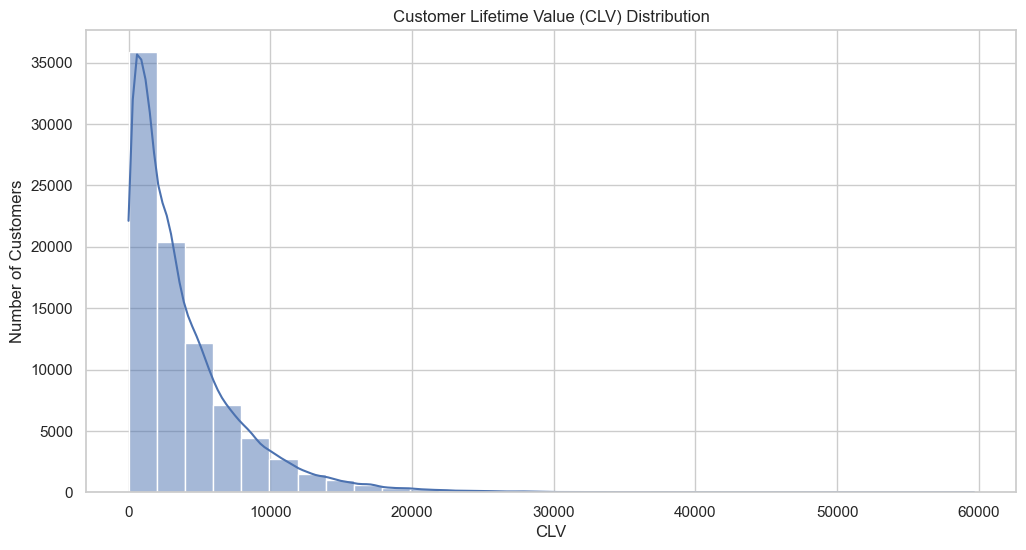

In [ ]:
rfm['CLV'] = rfm['Frequency'] * rfm['Monetary']
plt.figure(figsize=(12, 6))
sns.histplot(rfm['CLV'], kde=True, bins=30)
plt.title('Customer Lifetime Value (CLV) Distribution')
plt.xlabel('CLV')
plt.ylabel('Number of Customers')
plt.show()


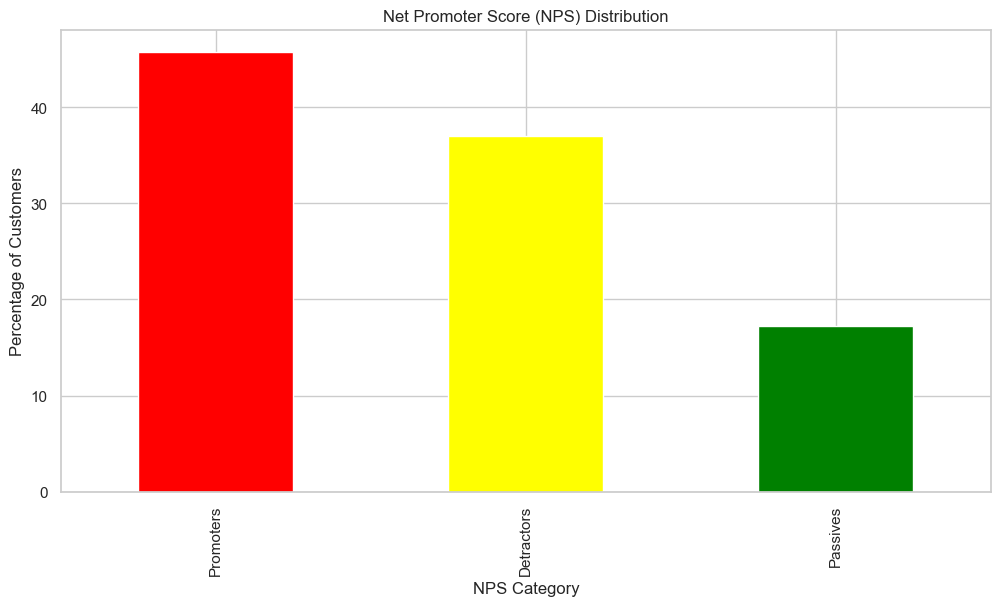

In [ ]:


# Categorize NPS based on ratings (adjusted for 1-5 scale)
nps_data = data[['Customer_ID', 'Ratings']].drop_duplicates()
nps_data['NPS_Category'] = pd.cut(nps_data['Ratings'], bins=[0, 2, 3, 5], labels=['Detractors', 'Passives', 'Promoters'])

# Calculate NPS scores
nps_scores = nps_data['NPS_Category'].value_counts(normalize=True) * 100

# Plot NPS scores
nps_scores.plot(kind='bar', figsize=(12, 6), color=['red', 'yellow', 'green'])
plt.title('Net Promoter Score (NPS) Distribution')
plt.xlabel('NPS Category')
plt.ylabel('Percentage of Customers')
plt.show()


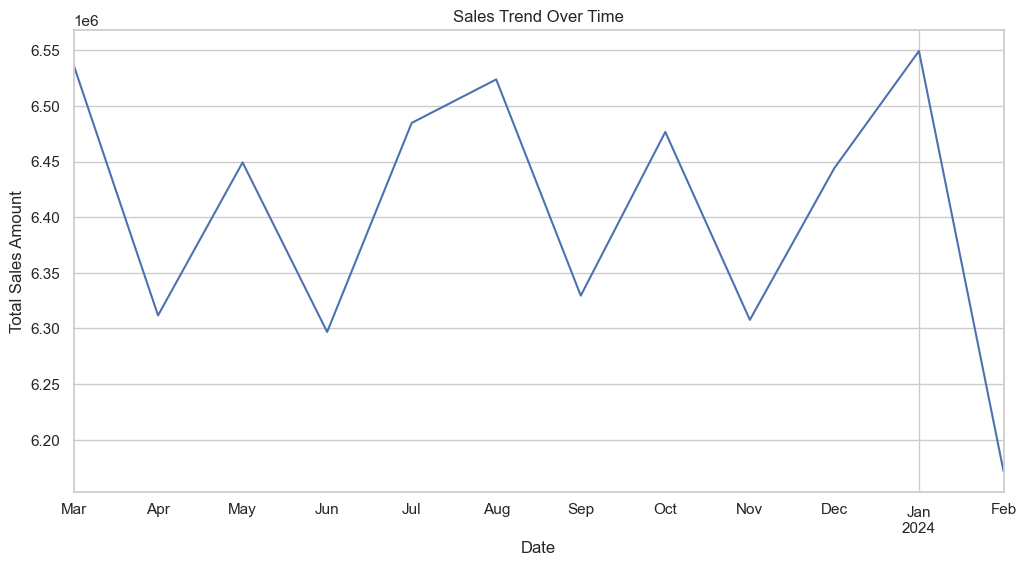

In [ ]:
sales_trend = data.groupby(data['Date'].dt.to_period('M'))['Amount'].sum()
sales_trend.plot(kind='line', figsize=(12, 6))
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.show()
